In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [2]:
df = pd.read_csv('Diode_Char.csv')
df.head()

,Vd,Id1,Id2
0,0.277,0.000002,0.000002
1,0.308,0.000003,0.000003
2,0.315,0.000003,0.000004
3,0.322,0.000003,0.000004
4,0.335,0.000004,0.000005


<Axes: xlabel='Vd', ylabel='Id1'>

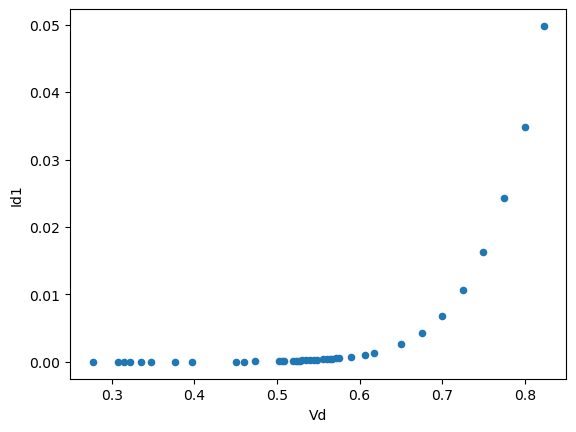

In [3]:
df.plot(x='Vd', y='Id1', kind='scatter')

<Axes: xlabel='Vd', ylabel='Id1'>

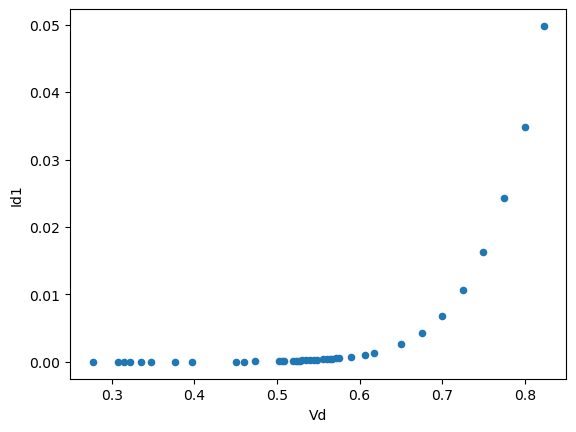

In [4]:
df.plot(x='Vd', y='Id1', kind='scatter')

In [5]:
df['ln_Id1'] = df['Id1'].apply(lambda x: np.log(x))
df.head()

,Vd,Id1,Id2,ln_Id1
0,0.277,0.000002,0.000002,-13.410045
1,0.308,0.000003,0.000003,-12.859999
2,0.315,0.000003,0.000004,-12.716898
3,0.322,0.000003,0.000004,-12.591735
4,0.335,0.000004,0.000005,-12.333906


In [6]:
df['ln_Id2'] = df['Id2'].apply(lambda x: np.log(x))
df.head()

,Vd,Id1,Id2,ln_Id1,ln_Id2
0,0.277,0.000002,0.000002,-13.410045,-13.284882
1,0.308,0.000003,0.000003,-12.859999,-12.716898
2,0.315,0.000003,0.000004,-12.716898,-12.534577
3,0.322,0.000003,0.000004,-12.591735,-12.380426
4,0.335,0.000004,0.000005,-12.333906,-12.110762


<Axes: xlabel='Vd', ylabel='ln_Id1'>

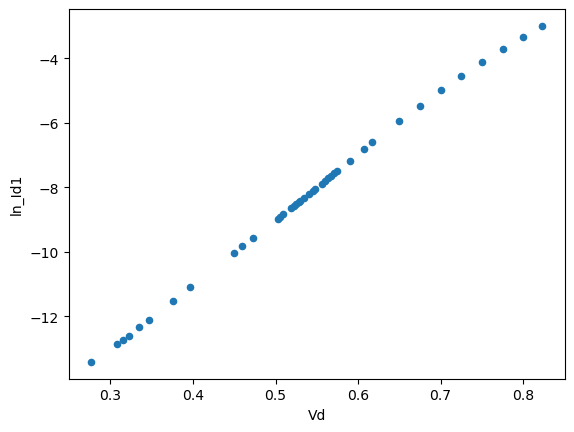

In [7]:
df.plot(x='Vd', y='ln_Id1', kind='scatter')

<Axes: xlabel='Vd', ylabel='ln_Id2'>

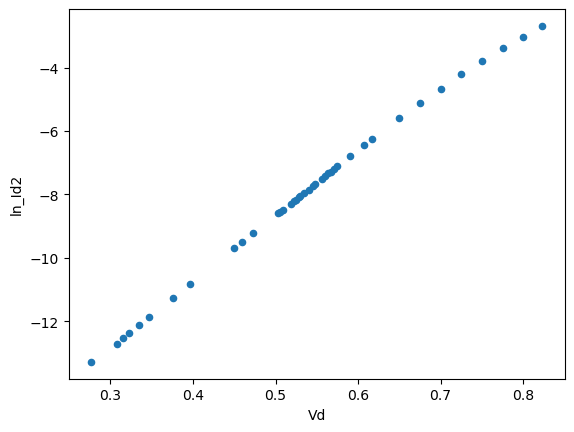

In [8]:
df.plot(x='Vd', y='ln_Id2', kind='scatter')

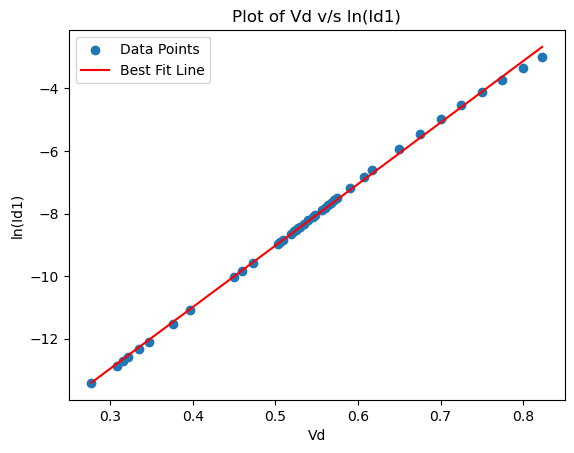

In [9]:
plt.scatter(df['Vd'], df['ln_Id1'], label='Data Points')
slope1, intercept1, r_value1, p_value1, std_err1 = linregress(df['Vd'], df['ln_Id1'])

best_fit_line = slope1 * df['Vd'] + intercept1
plt.plot(df['Vd'], best_fit_line, color='red', label='Best Fit Line')

plt.title('Plot of Vd v/s ln(Id1)')
plt.xlabel('Vd')
plt.ylabel('ln(Id1)')
plt.legend()
plt.show()

In [10]:
intercept1

-18.850705697181496

In [11]:
slope1

19.654487743295718

In [12]:
n1 = 1 / (slope1 * 0.026)
n1

1.9568832810032384

In [13]:
Is1 = np.exp(intercept1)
Is1

6.504928626233468e-09

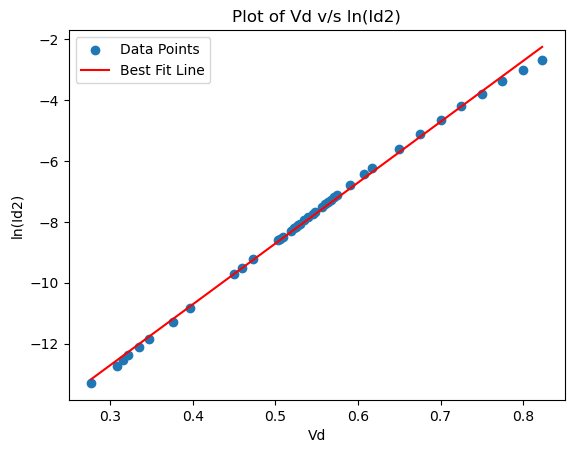

In [14]:
plt.scatter(df['Vd'], df['ln_Id2'], label='Data Points')
slope2, intercept2, r_value2, p_value2, std_err2 = linregress(df['Vd'], df['ln_Id2'])

best_fit_line2 = slope2 * df['Vd'] + intercept2
plt.plot(df['Vd'], best_fit_line2, color='red', label='Best Fit Line')

# Customize the plot
plt.title('Plot of Vd v/s ln(Id2)')
plt.xlabel('Vd')
plt.ylabel('ln(Id2)')
plt.legend()
plt.show()

In [15]:
intercept2

-18.693424333274358

In [16]:
slope2

19.96368078840502

In [17]:
n2 = 1 / (slope2 * 0.026)
n2

1.9265755082538218

In [18]:
Is2 = np.exp(intercept2)
Is2

7.612879649683447e-09

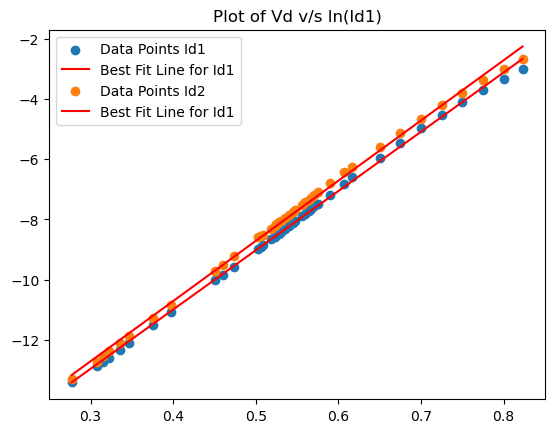

In [19]:
plt.scatter(df['Vd'], df['ln_Id1'], label='Data Points Id1')
plt.plot(df['Vd'], best_fit_line, color='red', label='Best Fit Line for Id1')
plt.scatter(df['Vd'], df['ln_Id2'], label='Data Points Id2')
plt.plot(df['Vd'], best_fit_line2, color='red', label='Best Fit Line for Id1')

plt.title('Plot of Vd v/s ln(Id1)')
plt.legend()
plt.show()

In [20]:
correlation_Id1 = df['Vd'].corr(df['ln_Id1'])
correlation_Id2 = df['Vd'].corr(df['ln_Id2'])

print(f'Correlation coefficient for Vd vs ln(Id1): {correlation_Id1}')
print(f'Correlation coefficient for Vd vs ln(Id2): {correlation_Id2}')


Correlation coefficient for Vd vs ln(Id1): 0.9994812699463022
Correlation coefficient for Vd vs ln(Id2): 0.999034314568899


In [22]:
R = 15 / 0.01066
print(f'Resistance: {R}')
V_T = 0.026
Vou1 =  n1 * V_T * ( np.log(Is1 * R))
Vou1 /= 2
Vou1

Resistance: 1407.1294559099438


-0.29513357934734685

In [23]:
1/(n2 * V_T)

19.96368078840502

In [24]:
1 / (Is2 * np.exp( 0.7 * slope2))

112.03908474885914

In [25]:
n1/n2

1.0157314222149987

In [26]:
2 * (n1/n2)

2.0314628444299974